# Importing Libraries and Loading Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
file=r"C:\Users\lenovo\Downloads\archive (1)\data.csv"
data=pd.read_csv(file)

In [4]:
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [5]:
print('Dataset size:',data.shape)

Dataset size: (169, 4)


## Checking for Missing Values and Duplicate Rows

In [6]:
missing_values=data.isnull().sum()
print("Missing Values in Each Column")
print(missing_values)

Missing Values in Each Column
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [7]:
duplicates=data.duplicated()
print("Duplicate Rows")
print(data[duplicates])

Duplicate Rows
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,169.0,63.846154,42.299949,15.0,45.000,60.0,60.0,300.0
Pulse,169.0,107.461538,14.510259,80.0,100.000,105.0,111.0,159.0
Maxpulse,169.0,134.047337,16.450434,100.0,124.000,131.0,141.0,184.0
Calories,164.0,375.790244,266.379919,50.3,250.925,318.6,387.6,1860.4


## Handling Missing Values and Duplicate Rows

In [10]:
data['Calories'].fillna(data['Calories'].median(),inplace=True)

In [11]:
missing_values=data.isnull().sum()
print("Misiing Values after Imputation")
print(missing_values)

Misiing Values after Imputation
Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
duplicate_count=data.duplicated().sum()
if duplicate_count==0:
    print("No duplicate values in the dataset.")
else: 
    print(f"Total duplicate values remaining:{duplicate_count}")

No duplicate values in the dataset.


In [14]:
print(data.shape)

(162, 4)


# Exploratory Data Analysis

## 1. Univariate Anlaysis

### Histograms for each feature

<Figure size 1500x800 with 0 Axes>

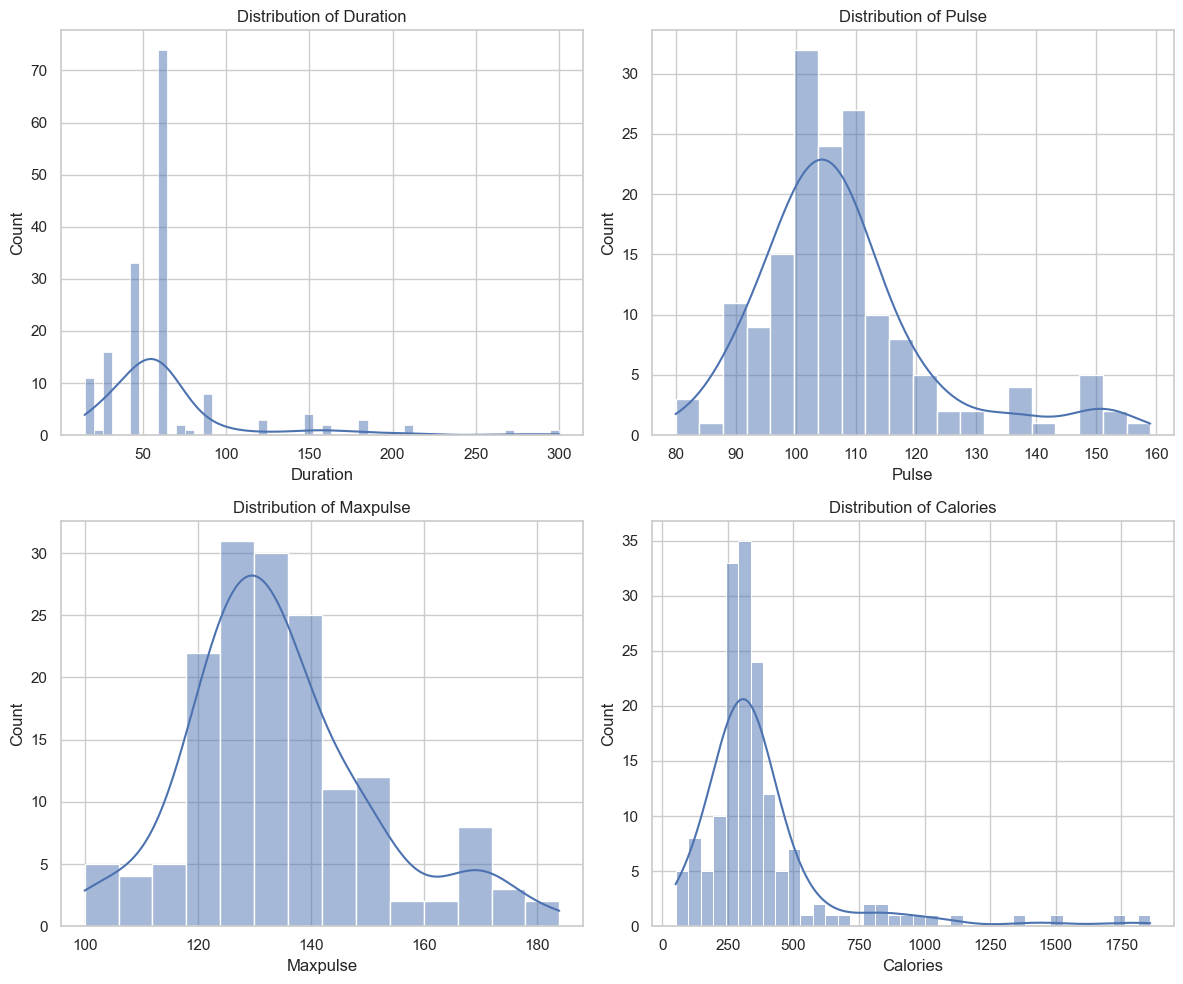

In [15]:
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
fig,axs=plt.subplots(2,2,figsize=(12,10))

sns.histplot(data['Duration'],kde=True,ax=axs[0,0])
axs[0,0].set_title('Distribution of Duration')

sns.histplot(data['Pulse'],kde=True,ax=axs[0,1])
axs[0,1].set_title('Distribution of Pulse')

sns.histplot(data['Maxpulse'],kde=True,ax=axs[1,0])
axs[1,0].set_title('Distribution of Maxpulse')

sns.histplot(data['Calories'],kde=True,ax=axs[1,1])
axs[1,1].set_title('Distribution of Calories')

plt.tight_layout()
plt.show()

### Boxplots to detect outliers in each feature

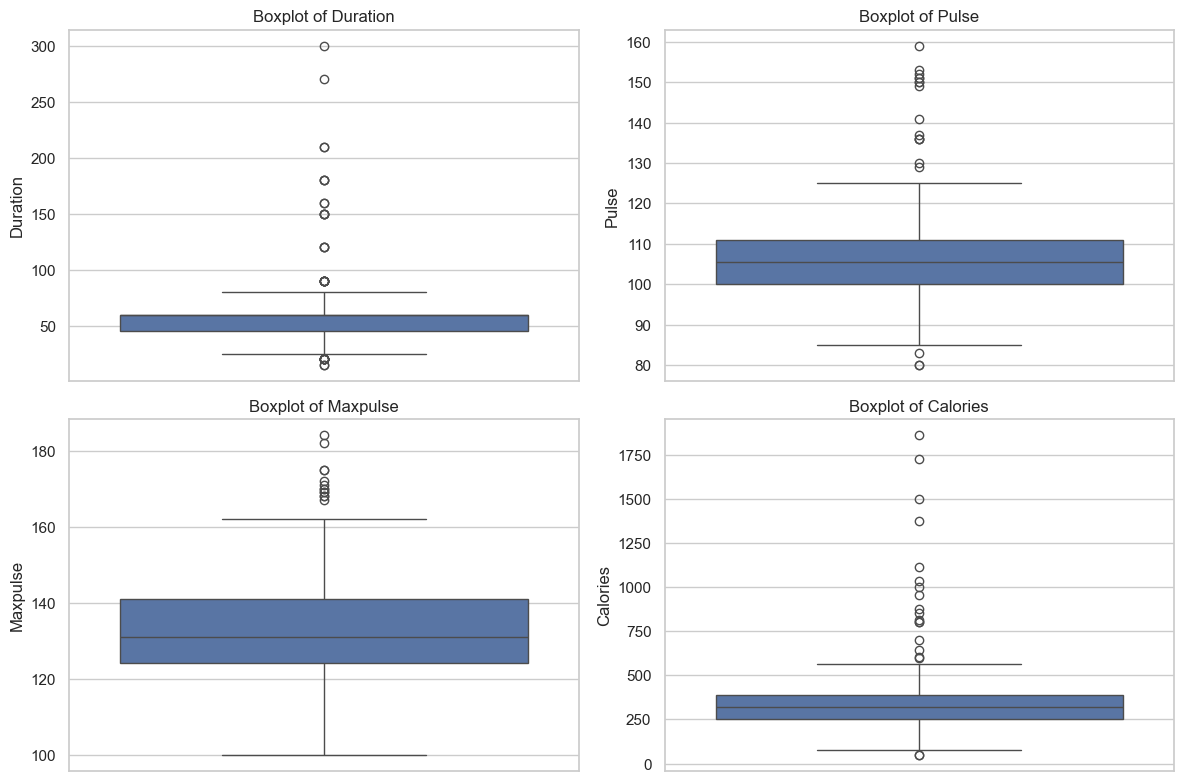

In [16]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(data['Duration'])
plt.title('Boxplot of Duration')

plt.subplot(2,2,2)
sns.boxplot(data['Pulse'])
plt.title('Boxplot of Pulse')

plt.subplot(2,2,3)
sns.boxplot(data['Maxpulse'])
plt.title('Boxplot of Maxpulse')

plt.subplot(2,2,4)
sns.boxplot(data['Calories'])
plt.title('Boxplot of Calories')

plt.tight_layout()
plt.show()

## Outliers Detection using IQR

In [17]:
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])
    return outliers
outliers = detect_outliers_iqr(data)
outliers_summary = {col: len(outliers[col].dropna()) for col in data.columns}
print(outliers_summary,data.shape)

{'Duration': 85, 'Pulse': 85, 'Maxpulse': 85, 'Calories': 85} (162, 4)


## Remove Outliers

In [18]:
data = data[~data.index.isin(outliers.index)].reset_index(drop=True)
print(outliers_summary, data.shape)

{'Duration': 85, 'Pulse': 85, 'Maxpulse': 85, 'Calories': 85} (114, 4)


<Figure size 1200x800 with 0 Axes>

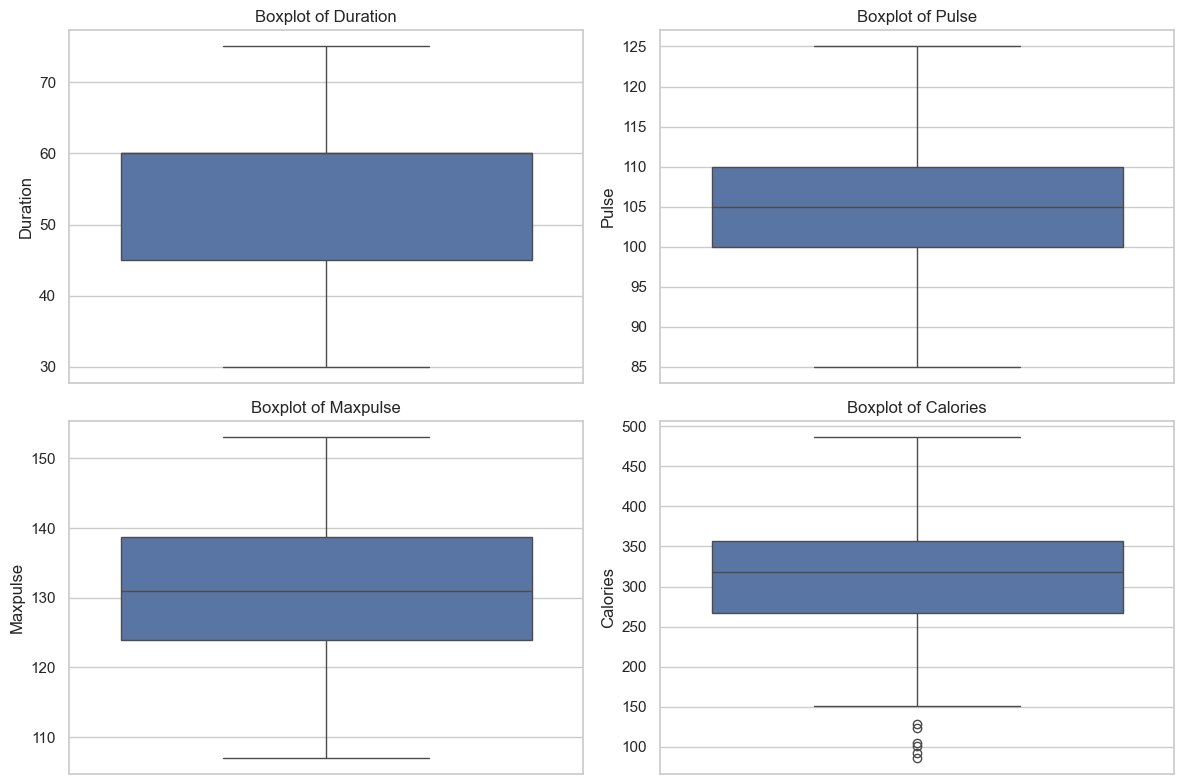

In [19]:
plt.figure(figsize=(12, 8))
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data['Duration'])
plt.title('Boxplot of Duration')

plt.subplot(2, 2, 2)
sns.boxplot(data['Pulse'])
plt.title('Boxplot of Pulse')

plt.subplot(2, 2, 3)
sns.boxplot(data['Maxpulse'])
plt.title('Boxplot of Maxpulse')

plt.subplot(2, 2, 4)
sns.boxplot(data['Calories'])
plt.title('Boxplot of Calories')

plt.tight_layout()
plt.show()

## 1. Bivariate Anlaysis

### Scatter Plot for Relationship Exploration

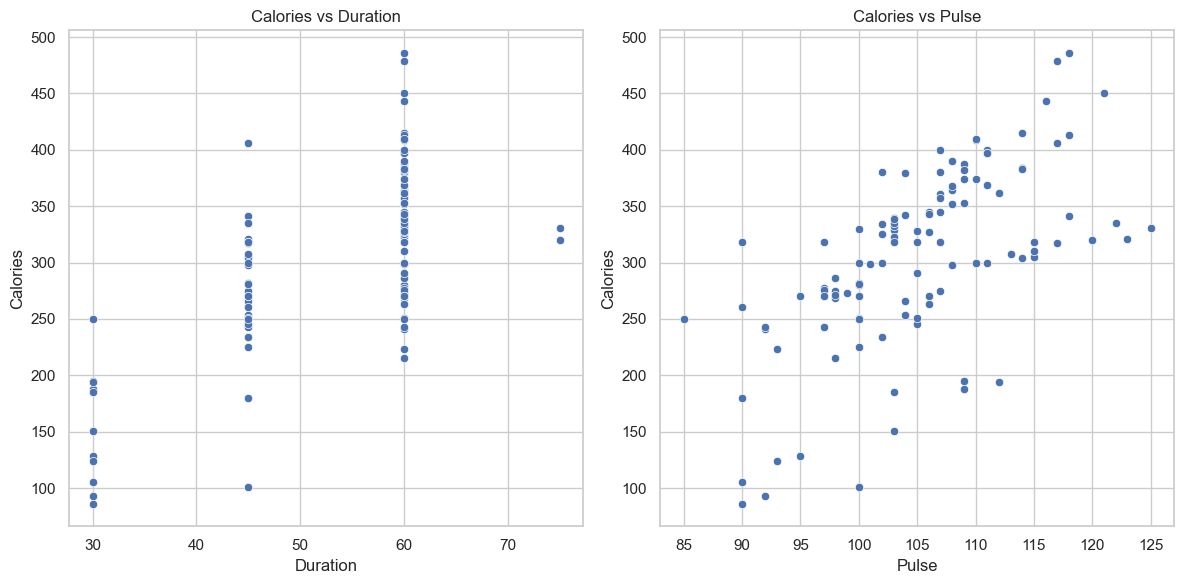

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Duration',y='Calories',data=data)
plt.title('Calories vs Duration')
plt.subplot(1,2,2)
sns.scatterplot(x='Pulse',y='Calories',data=data)
plt.title('Calories vs Pulse')
plt.tight_layout()
plt.show()

The scatter plots above display:

Calories vs. Duration: A positive trend where longer workout durations tend to result in higher calorie expenditure, although there is some spread.
Calories vs. Pulse: There is a moderate correlation, with higher pulse rates often leading to more calories burned.

### JointPlot for Deeper Relationship Exploration

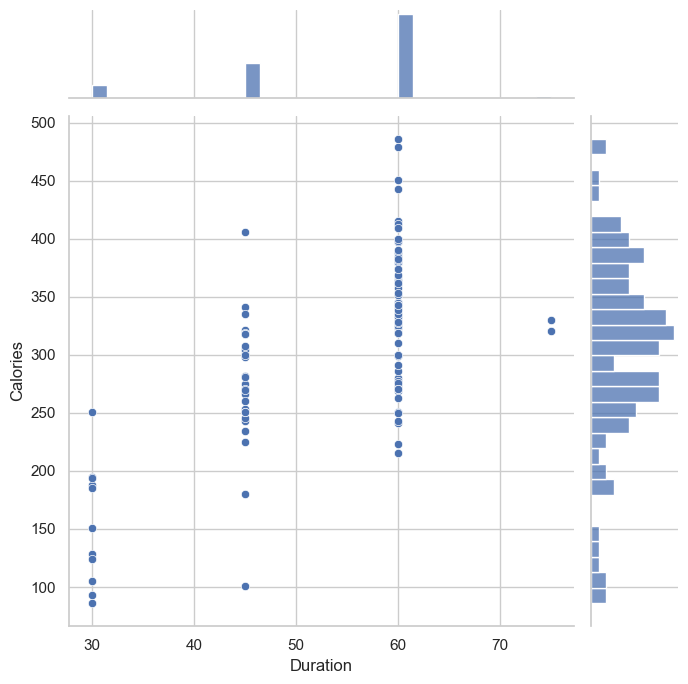

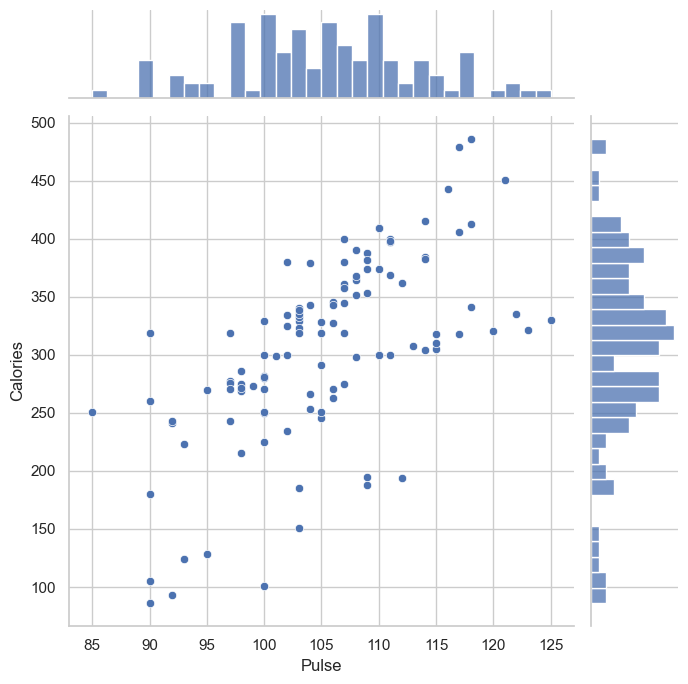

In [21]:
sns.jointplot(x='Duration', y='Calories', data=data, kind='scatter', height=7, marginal_kws=dict(bins=30,fill=True))
plt.show()
sns.jointplot(x='Pulse', y='Calories', data=data, kind='scatter', height=7, marginal_kws=dict(bins=30,fill=True))
plt.show()

The jointplots provide a more detailed view of the relationships:

Calories vs. Duration: Shows a clear positive trend, with the marginal histograms indicating a majority of shorter-duration sessions and fewer high-calorie-burning sessions.
Calories vs. Pulse: Highlights a somewhat linear relationship between higher pulse rates and increased calorie expenditure, with most data points clustered around the lower pulse range.

### Violin Plot to Visualize Distribution and Density

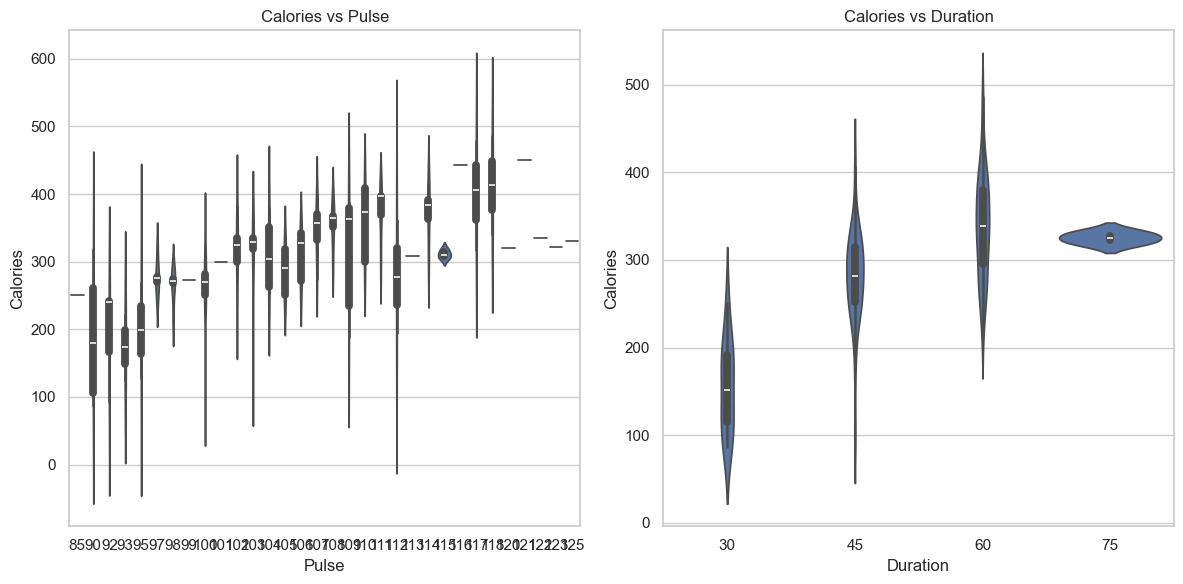

In [22]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.violinplot(x='Pulse',y='Calories',data=data)
plt.title('Calories vs Pulse')

plt.subplot(1,2,2)
sns.violinplot(x='Duration',y='Calories',data=data)
plt.title('Calories vs Duration')
plt.tight_layout()
plt.show()

The violin plots show the distribution and density of Calories for different ranges of Pulse and Duration:

Calories vs. Pulse: Displays how the distribution of calories burned varies with pulse rates. There's a higher density of lower calorie counts for mid-range pulse values.
Calories vs. Duration: Indicates that shorter durations tend to result in lower calorie burns, while longer durations have a wider spread of calories burned.

### Regression Line for Calories vs Maxpulse

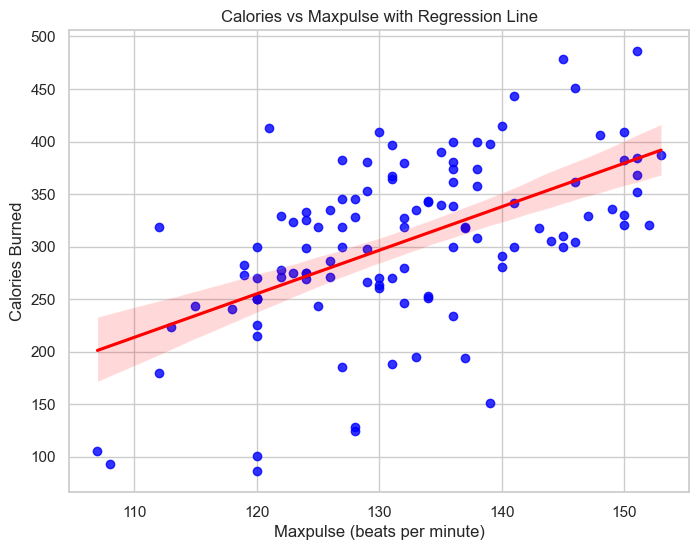

In [23]:
plt.figure(figsize=(8,6))
sns.regplot(x='Maxpulse',y='Calories',data=data,scatter_kws={"color":"blue"},line_kws={"color":"red"})
plt.title('Calories vs Maxpulse with Regression Line')
plt.xlabel('Maxpulse (beats per minute)')
plt.ylabel('Calories Burned')
plt.show()

The scatter plot with a regression line shows the relationship between Maxpulse and Calories:

There is a positive trend, indicating that higher maximum pulse rates are associated with burning more calories.
The regression line suggests a fairly linear relationship, where increases in Maxpulse tend to lead to higher calorie expenditure, although there is some variability.
This insight shows that pushing the maximum heart rate higher during workouts generally leads to more calories burned, but the effect may vary depending on other factors like workout duration or intensity.

## 1. Multivariate Anlaysis

### Faceted Scatter Plot for Calories vs Duration by Pulse Range

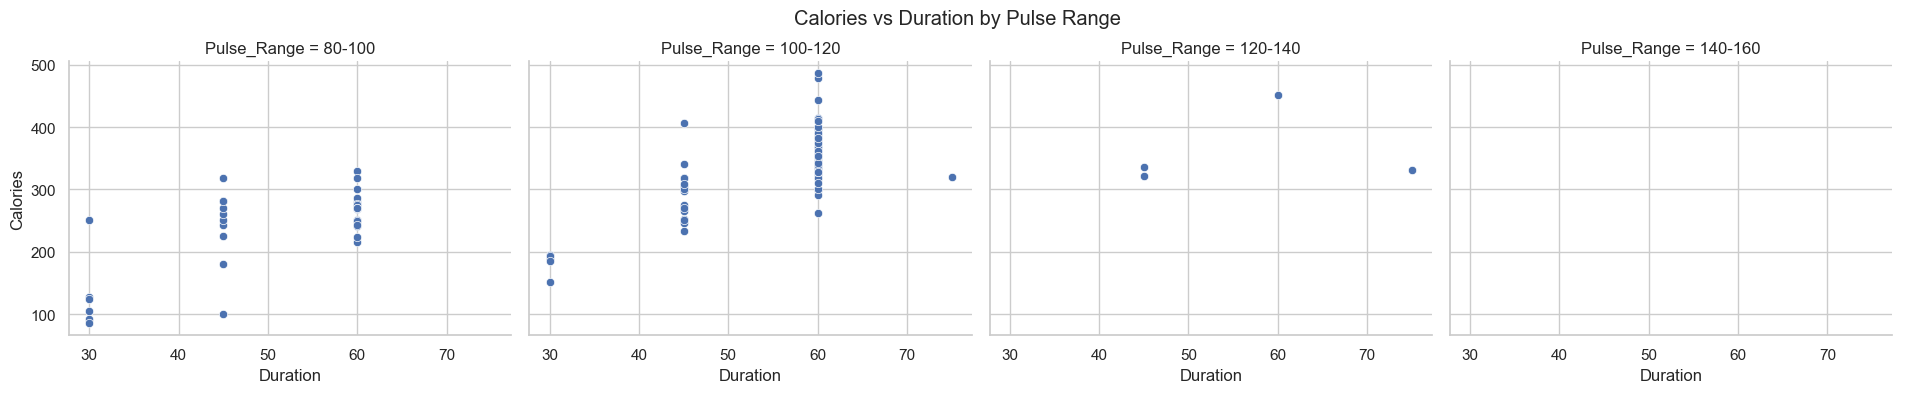

In [24]:
data['Pulse_Range']=pd.cut(data['Pulse'],bins=[80,100,120,140,160],labels=['80-100','100-120','120-140','140-160'])
g=sns.FacetGrid(data,col='Pulse_Range',height=4,aspect=1.2)
g.map(sns.scatterplot,'Duration','Calories').add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Calories vs Duration by Pulse Range')
plt.show()

The faceted scatter plot shows how the relationship between Duration and Calories changes across different Pulse ranges:

For lower pulse ranges (80-100), there's less variation in calories burned, regardless of workout duration.
As the pulse range increases, the spread of calories burned increases, indicating that higher pulse rates contribute to more calories burned during longer sessions.

### Multi-line Plot

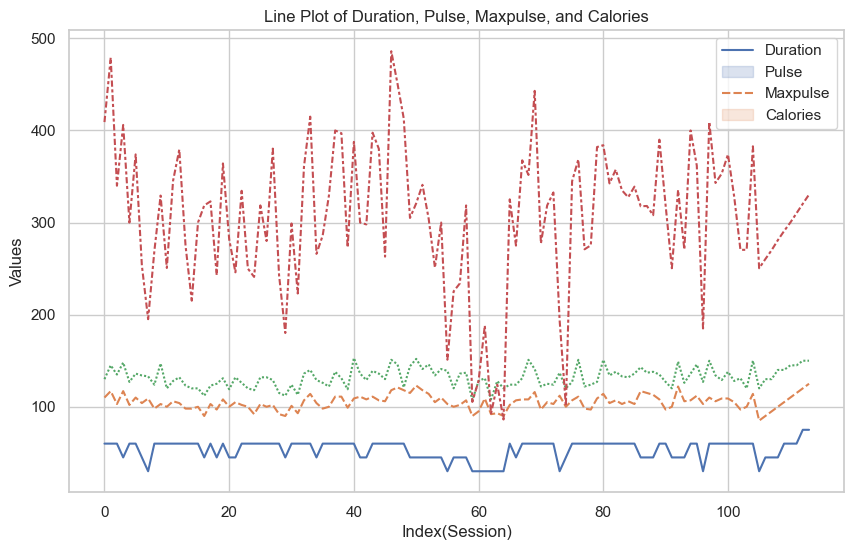

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data[['Duration','Pulse','Maxpulse','Calories']])
plt.title('Line Plot of Duration, Pulse, Maxpulse, and Calories')
plt.xlabel('Index(Session)')
plt.ylabel('Values')
plt.legend(labels=['Duration','Pulse','Maxpulse','Calories'])
plt.show()

### Pairplot for Relationship Visualization

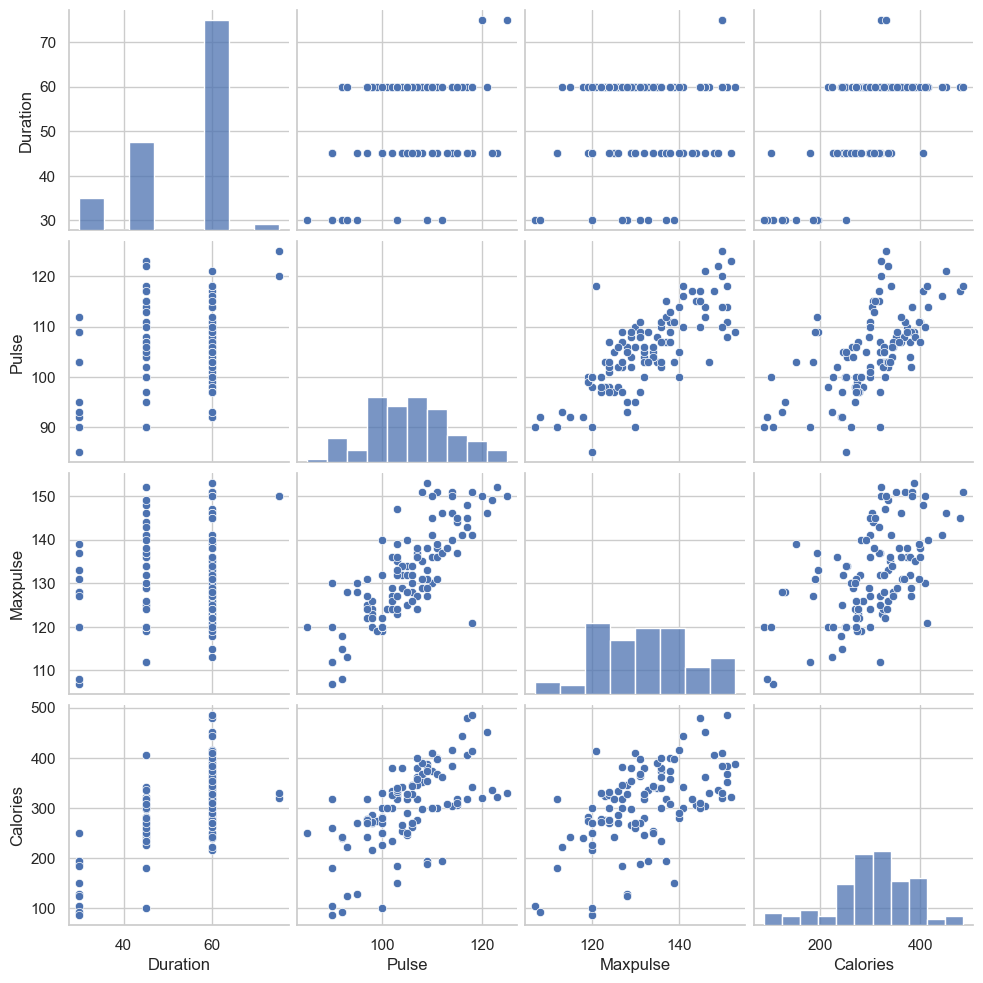

In [26]:
sns.pairplot(data)
plt.show()

From the pairplot, you can see:

The relationship between Pulse and Maxpulse stands out, showing a clear positive correlation.
Duration and Calories also appear to have a noticeable trend.

### Correlation Matrix Heatmap

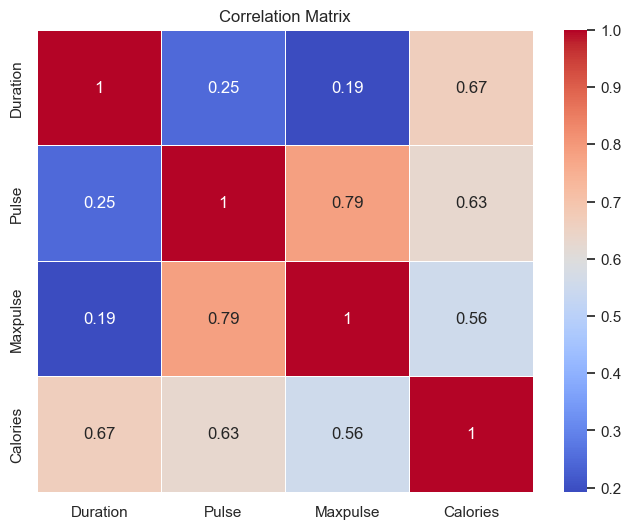

In [27]:
plt.figure(figsize=(8,6))
numeric_data=data.select_dtypes(include=[np.number])
correlation_matrix=numeric_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The heatmap highlights the correlation between variables:

Pulse and Maxpulse show the strongest positive correlation, as expected.
Calories has a moderate positive correlation with Duration, meaning that longer workout sessions are associated with burning more calories.
There is also a mild correlation between Calories and Pulse, indicating that a higher average heart rate tends to lead to more calories burned.

# Prediction Model Training

In [28]:
X=data[['Duration','Pulse','Maxpulse']]
y=data['Calories']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

## Linear Regression Model for Predictions

In [30]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [31]:
import joblib
joblib.dump(regressor, "calories_regressor.pkl")

['calories_regressor.pkl']

In [32]:
y_pred=regressor.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Linear Regression - MSE: {mse}, R²: {r2}')

Linear Regression - MSE: 852.5254365711064, R²: 0.830395672611983


Linear Regression:

MSE: 852.53
R²: 0.83
The Linear Regression model performed quite well with an R² score of 0.83, indicating that approximately 83% of the variance in the calorie data can be explained by the model. The relatively low MSE value of 852.53 shows that the model's predictions are reasonably close to the actual values.

## Random Forest and Gradient Boosting Models

In [33]:
rf_model=RandomForestRegressor(random_state=123)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=123)

In [34]:
y_pred_rf=rf_model.predict(X_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print(f'Random Forest - MSE: {mse_rf}, R²: {r2_rf}')

Random Forest - MSE: 1314.0805086754729, R²: 0.738572327291471


Random Forest:

MSE: 1314.08
R²: 0.74
The Random Forest model yielded a slightly lower performance compared to Linear Regression, with an R² of 0.74. Although it still explains 74% of the variance, the higher MSE suggests that it is less accurate in predicting calorie values compared to the Linear Regression model.

In [35]:
gb_model=GradientBoostingRegressor(random_state=123)
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=123)

In [36]:
y_pred_gb=gb_model.predict(X_test)
mse_gb=mean_squared_error(y_test,y_pred_gb)
r2_gb=r2_score(y_test,y_pred_gb)
print(f'Gradient Boosting - MSE: {mse_gb}, R²: {r2_gb}')

Gradient Boosting - MSE: 1671.3307776282777, R²: 0.6674997364035922


Gradient Boosting:

MSE: 1671.33
R²: 0.67
The Gradient Boosting model has the lowest performance among the three models, with an R² of 0.67 and the highest MSE of 1671.33. This suggests that the model struggled to explain the variance in the calorie data as well as the other models.

### Display Predictions Alongside Actual Values

In [37]:
y_pred=regressor.predict(X_test)
comparison_df=pd.DataFrame({'Actual Calories': y_test,'Predicted Calories': y_pred})
print(comparison_df.head())

     Actual Calories  Predicted Calories
104            382.8          385.355202
87             318.0          308.514729
42             298.0          275.054585
82             357.5          346.326556
93             270.8          264.500168


When comparing the predicted calorie values to the actual values for the test dataset using the Linear Regression model:

The model's predictions are relatively close to the actual values for most instances.
For example, in one test case, the actual calorie value is 382.8 while the predicted value is 385.36, showing a minor difference.
Overall Conclusion:

The Linear Regression model performed the best in predicting the calorie values, with the lowest MSE and the highest R² score, making it the most suitable model for this dataset.
Random Forest and Gradient Boosting provided decent predictions but performed slightly worse in terms of both accuracy and variance explanation.